### Setup


In [1]:
#import zipfile

#with zipfile.ZipFile('/content/alzheimer-mri-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/alzheimer-mri-dataset')

In [2]:
#import zipfile

#with zipfile.ZipFile(r'C:\Users\Yashu\Downloads\archive.zip') as zip_ref:
#      zip_ref.extractall(r'C:\Users\Yashu\Downloads\archive')


### import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,roc_curve, auc,confusion_matrix
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_SET_PATH = r"C:\Users\DELL\Downloads\Dataset"
categories=os.listdir(DATA_SET_PATH)
categories



['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [5]:
# Encoding
def MyEncoder(Categories):
  classes_names={}
  for i in range(len(Categories)):
    classes_names[i]=Categories[i]
  return classes_names

In [6]:
classnames = MyEncoder(categories)
classnames

{0: 'Mild_Demented',
 1: 'Moderate_Demented',
 2: 'Non_Demented',
 3: 'Very_Mild_Demented'}

In [7]:
def CreateDataSet (PATH,dataList):

  for cat in categories :
    CAT_PATH = os.path.join(DATA_SET_PATH ,cat)

    for imgs in tqdm(os.listdir(CAT_PATH)):
      try:
            img=cv2.imread(os.path.join(CAT_PATH ,imgs))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # conv channels from 3 to 1
            classNum=categories.index(cat)
            dataList.append([img,classNum])
      except Exception as e:
            print(e)



In [8]:
dataSet=[]
CreateDataSet(DATA_SET_PATH,dataSet)

100%|█████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:13<00:00, 165.97it/s]


In [9]:
classnames[dataSet[9][1]]

'Mild_Demented'

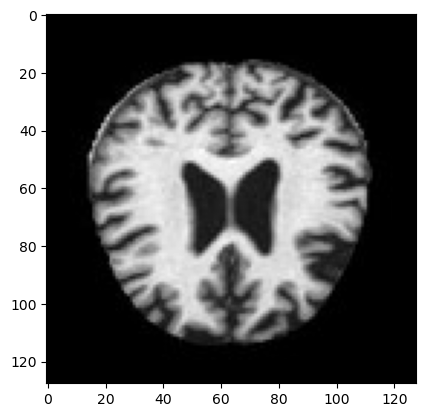

In [10]:
plt.imshow(dataSet[2][0], cmap='gray')
plt.show()

In [11]:
import random
random.shuffle(dataSet)


In [12]:
for trainSample in dataSet[:10]:
    print(classnames[trainSample[1]])

Very_Mild_Demented
Non_Demented
Very_Mild_Demented
Non_Demented
Very_Mild_Demented
Very_Mild_Demented
Very_Mild_Demented
Non_Demented
Non_Demented
Non_Demented


In [13]:
dataSet[0][0].shape

(128, 128)

#### Spilt Data


In [14]:
X=[]
Y=[]
for feature,label in dataSet:
    X.append(feature)
    Y.append(label)

In [15]:
x_train ,x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=42)
x_test,x_valid ,y_test,y_valid = train_test_split(x_test,y_test,test_size=0.60,stratify=y_test,random_state=42)

In [16]:
print(len(y_train))
for i in range(4) :
  print(i , " -- " , y_train.count(i))

4800
0  --  672
1  --  48
2  --  2400
3  --  1680


In [17]:
print(len(y_valid))
for i in range(4) :
  print(i , " -- " , y_valid.count(i))

960
0  --  134
1  --  10
2  --  480
3  --  336


In [18]:
print(len(y_test))
for i in range(4) :
  print(i , " -- " , y_test.count(i))

640
0  --  90
1  --  6
2  --  320
3  --  224


In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
x_test = np.array(x_test)
y_test = np.array(y_test)


## Model

In [20]:
model= keras.Sequential([
    Conv2D(128,kernel_size=3,padding='same', activation='relu' ,input_shape=(128,128,1)),
    BatchNormalization(),
    MaxPool2D(2,padding='same'),

    Conv2D(64,kernel_size=3, activation='relu' ),
    BatchNormalization(),
    MaxPool2D(2),
    Dropout(0.3),

    Conv2D(32,kernel_size=3, activation='relu' ),
    BatchNormalization(),
    MaxPool2D(2,padding='same'),
    Dropout(0.3),

    Conv2D(16,kernel_size=3, activation='relu' ,padding='same'),
    BatchNormalization(),
    MaxPool2D(2),
    Dropout(0.3),

    Flatten(),
    Dropout(0.5),
    Dense(512),
    Dense(4, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 503,092 (1.92 MB)

 Trainable params: 502,612 (1.92 MB)

 Non-trainable params: 480 (1.88 KB)

In [22]:
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall()])

In [23]:
total_images = 4800
class_counts = [672, 48, 2400, 1680]

class_weights = {}
for i, count in enumerate(class_counts):
    class_weights[i] = total_images / (len(class_counts) * count)

print( class_weights)

{0: 1.7857142857142858, 1: 25.0, 2: 0.5, 3: 0.7142857142857143}


In [24]:
num_classes = 4  # Number of classes

y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_valid_encoded = to_categorical(y_valid, num_classes=num_classes)



In [25]:
hist = model.fit(x=x_train, y=y_train_encoded, batch_size=32, epochs=60, validation_data=(x_valid, y_valid_encoded),
                 shuffle=True, class_weight=class_weights, validation_batch_size=64)

# 4 times with 15 epochs with class_weights
# 4 times with 30 epochs without class_weights
# 1 times with 60 epochs with class_weights
# total epochs = 240 epochs


Epoch 1/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.2908 - loss: 10.9856 - recall: 0.2762 - val_accuracy: 0.4427 - val_loss: 2.5817 - val_recall: 0.4375
Epoch 2/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.2936 - loss: 2.7845 - recall: 0.2231 - val_accuracy: 0.2542 - val_loss: 2.5712 - val_recall: 0.2250
Epoch 3/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.3092 - loss: 2.6152 - recall: 0.2332 - val_accuracy: 0.5010 - val_loss: 0.9723 - val_recall: 0.3927
Epoch 4/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.3359 - loss: 1.9059 - recall: 0.2035 - val_accuracy: 0.5208 - val_loss: 1.0024 - val_recall: 0.3562
Epoch 5/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.4092 - loss: 1.3356 - recall: 0.2425 - val_accuracy: 0.4167 - val_loss: 1.2200 - val_recall: 0.2260
Epoch 6/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.4049 - loss: 1.1724 - recall: 0.2202 - val_accuracy: 0.4885 - val_loss: 1.0231 - val_recall: 0.32

In [30]:
model.save('model.h5')

## Evaluation

In [31]:
model = load_model('model.h5')

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step


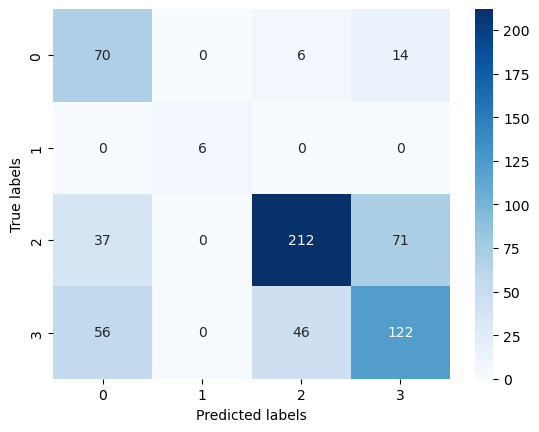

In [32]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
confusion_Matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.43      0.78      0.55        90
           1       1.00      1.00      1.00         6
           2       0.80      0.66      0.73       320
           3       0.59      0.54      0.57       224

    accuracy                           0.64       640
   macro avg       0.71      0.75      0.71       640
weighted avg       0.68      0.64      0.65       640



## test model

In [34]:
start = np.random.randint(25,60)
end =  start +21
x_evl = x_test[start:end]
y_evl = y_test[start:end]
pred_evl =y_pred[start:end]

# x_evl_processed = np.expand_dims(x_evl, axis=-1)  # Assuming grayscale images, add the channel dimension
# # Predict using the processed data
# pred_evl = model.predict(x_evl_processed)



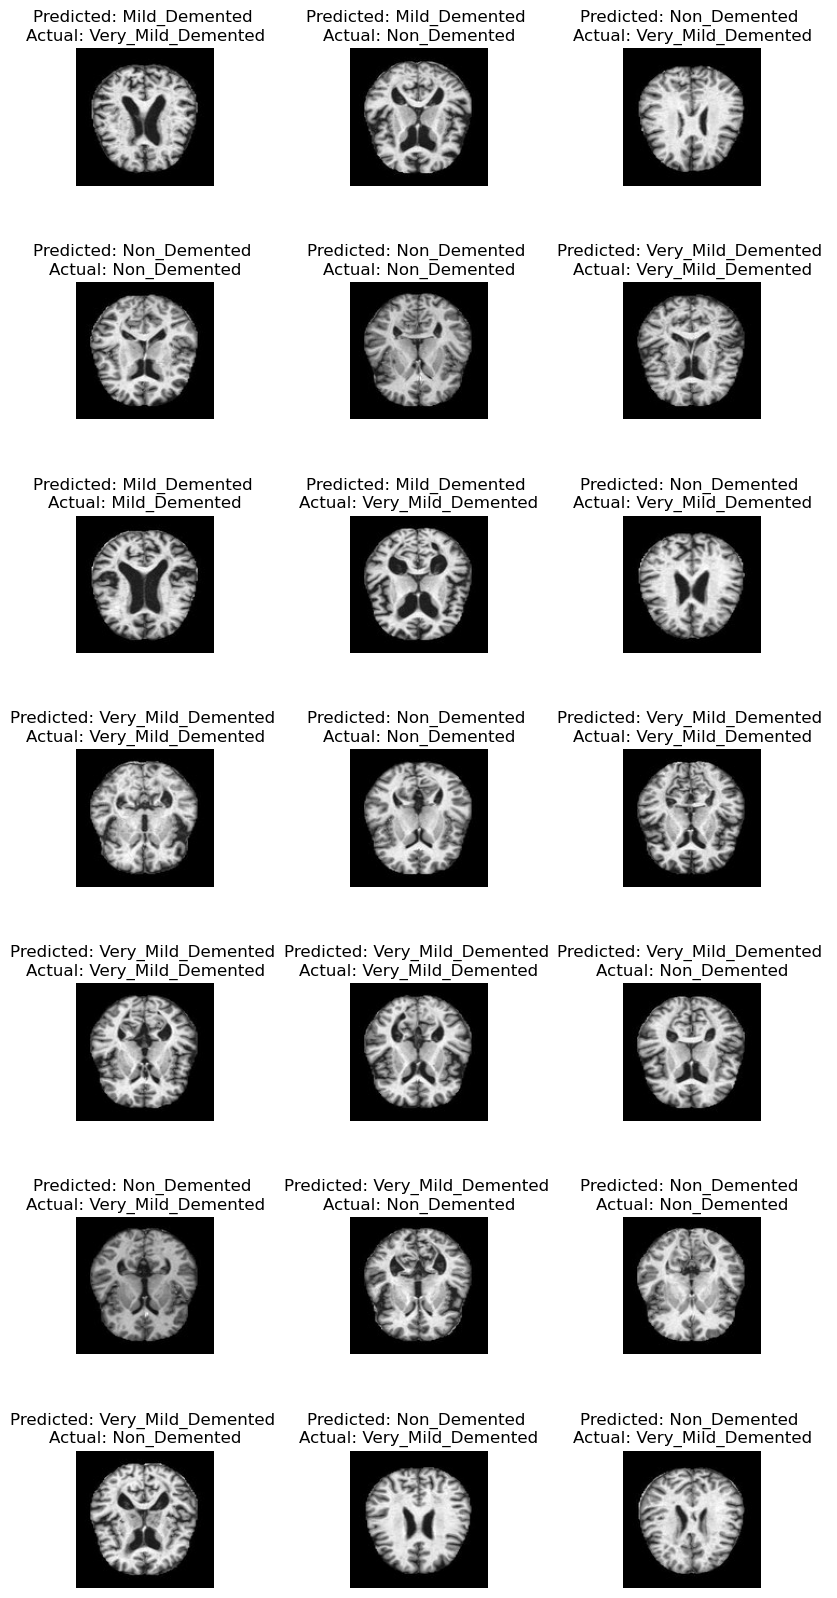

In [35]:
fig, axs = plt.subplots(7, 3, figsize=(10, 20))
axs = axs.flatten()

for i  in range(len(y_evl)):

  axs[i].imshow(x_evl[i], cmap='gray')
  predicted_class_index = np.argmax(pred_evl[i])  # Get the index of the highest probability class
  axs[i].set_title(f'Predicted: {classnames[predicted_class_index]} \nActual: {classnames[y_evl[i]]}')
  axs[i].axis('off')
  axs[i].axis('off')

plt.subplots_adjust(hspace=0.7)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import random  # Import the random module
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load and preprocess dataset
DATA_SET_PATH = r"C:\Users\DELL\Downloads\Dataset"
categories = os.listdir(DATA_SET_PATH)

def CreateDataSet(PATH, dataList):
    for cat in categories:
        CAT_PATH = os.path.join(DATA_SET_PATH, cat)
        for imgs in tqdm(os.listdir(CAT_PATH)):
            try:
                img = cv2.imread(os.path.join(CAT_PATH, imgs))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                classNum = categories.index(cat)
                dataList.append([img, classNum])
            except Exception as e:
                print(e)

dataSet = []
CreateDataSet(DATA_SET_PATH, dataSet)

random.shuffle(dataSet)

X = []
Y = []
for feature, label in dataSet:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.60, stratify=y_test, random_state=42)

x_train = x_train.reshape(-1, 128, 128, 1)
x_valid = x_valid.reshape(-1, 128, 128, 1)
x_test = x_test.reshape(-1, 128, 128, 1)

# Convert labels to categorical
num_classes = 4
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_valid_encoded = to_categorical(y_valid, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Build the model
model = Sequential([
    Conv2D(128, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPool2D(2, padding='same'),

    Conv2D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(2),
    Dropout(0.3),

    Conv2D(32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(2, padding='same'),
    Dropout(0.3),

    Conv2D(16, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(2),
    Dropout(0.3),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
    x=x_train, y=y_train_encoded,
    batch_size=32, epochs=60,
    validation_data=(x_valid, y_valid_encoded),
    shuffle=True, validation_batch_size=64
)

# Plotting accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 138.60it/s]


OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



100%|█████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:15<00:00, 140.43it/s]
C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 503,092 (1.92 MB)

 Trainable params: 502,612 (1.92 MB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.4580 - loss: 2.2566 - val_accuracy: 0.5000 - val_loss: 2.4878
Epoch 2/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.5239 - loss: 0.9654 - val_accuracy: 0.3438 - val_loss: 1.1771
Epoch 3/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.5241 - loss: 0.9429 - val_accuracy: 0.3365 - val_loss: 1.2008
Epoch 4/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.5596 - loss: 0.9102 - val_accuracy: 0.3500 - val_loss: 2.4390
Epoch 5/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.5865 - loss: 0.8760 - val_accuracy: 0.6177 - val_loss: 0.8225
Epoch 6/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.5821 - loss: 0.8771 - val_accuracy: 0.3021 - val_loss: 1.2193
Epoch 7/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.5926 - loss: 0.8574 - val_accuracy: 0.4688 - val_loss: 1.0467
Epoch 8/60
150/150 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.6123 - loss: 0.8325 - val_accu